# 📑 Project: Predicting COVID-19 Deaths and Recoveries Using Linear Regression

# 🎉 Welcome to the Final Project!

Congratulations on reaching the final project! You've worked hard learning about **linear regression**, and now it's time to apply everything you've learned to an important real-world dataset. For this project, we’ll be using **COVID-19 data from Africa**—a pandemic that impacted all of us in one way or another.

## 🌍 Context and Motivation
In this project, we are going to predict the **number of deaths** and **number of recoveries** based on the **confirmed cases** in various African countries. This is a chance for you to work with **real health data** from the pandemic and make meaningful predictions. By understanding how confirmed cases affect both recovery and death rates, you’ll gain insights into the trends of this global health crisis in the African context.

Sounds interesting, right? Let's dive into this critical dataset and use your linear regression skills to analyze and make predictions that matter!

## 🚀 Step-by-Step Outline

1. **Load and Explore the Dataset**
2. **Visualize the Data**
3. **Clean and Split the Data**
4. **Apply Linear Regression**
   - Predict **Deaths** from **Confirmed** cases.
   - Predict **Recovered** from **Confirmed** cases.
5. **Visualize the Model**
6. **Evaluate the Model**
7. **Visualize the Predictions**

## 💾 Step 1: Load and Explore the Dataset

Our dataset is a CSV file—kind of like an Excel sheet, but way more fun for coding. Let’s load it up and take a peek!

(The dataset file needs to be in the same directory as this notebook.)

In [5]:
# Import necessary libraries
import numpy as np
import pandas as pd

# Load the dataset from a CSV file
data = pd.read_csv('SGA_Health_DataSet.csv')


# Show the first few rows to get a sense of the data
data.head(10)


,Country/Region,Confirmed,Recovered,Deaths
0,Algeria,27973,18837,1163
1,Angola,950,242,41
2,Benin,1770,1036,35
3,Botswana,739,63,2
4,Burkina Faso,1100,926,53
5,Burundi,378,301,1
6,Cabo Verde,2328,1550,22
7,Cameroon,17110,14539,391
8,Central African Republic,4599,1546,59
9,Chad,922,810,75


### 📊 What's in Our Dataset?
Here’s a breakdown of the key columns:
* **Country/Region**: The name of the African country or region.
* **Confirmed**: The total number of confirmed COVID-19 cases in that country.
* **Recovered**: The total number of people who have recovered from the virus.
* **Deaths**: The total number of deaths due to COVID-19.

This data will allow us to explore important questions like:
* How do **confirmed cases** relate to the number of **recoveries**?
* Can we predict the number of **deaths** based on the number of **confirmed cases**?

By analyzing this data, we can better understand the spread and impact of the pandemic across Africa.

Now that we’ve got a sense of what’s in our dataset, let’s move on to some visualizations and predictions!

# 📊 Step 2: Visualize the Data
We’ll create scatter plots to visually explore the relationships between:
* **Confirmed** cases vs **Deaths**.
* **Confirmed** cases vs **Recovered**.

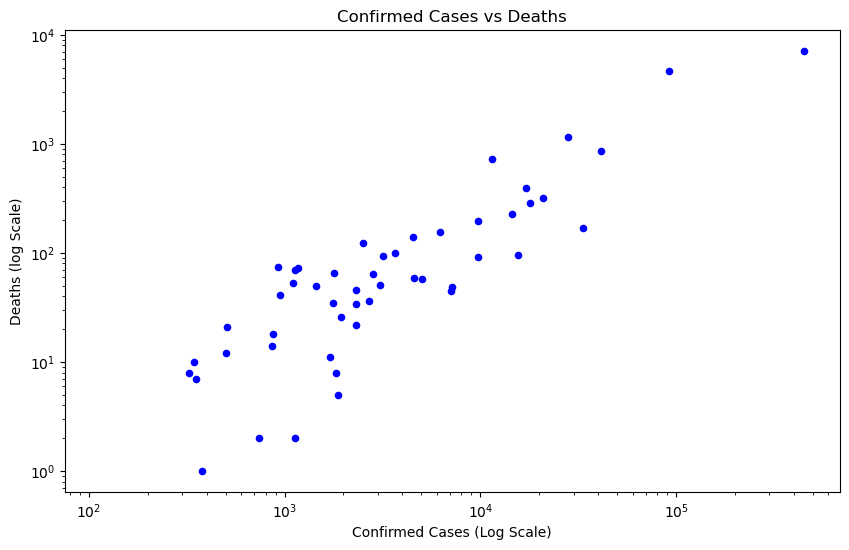

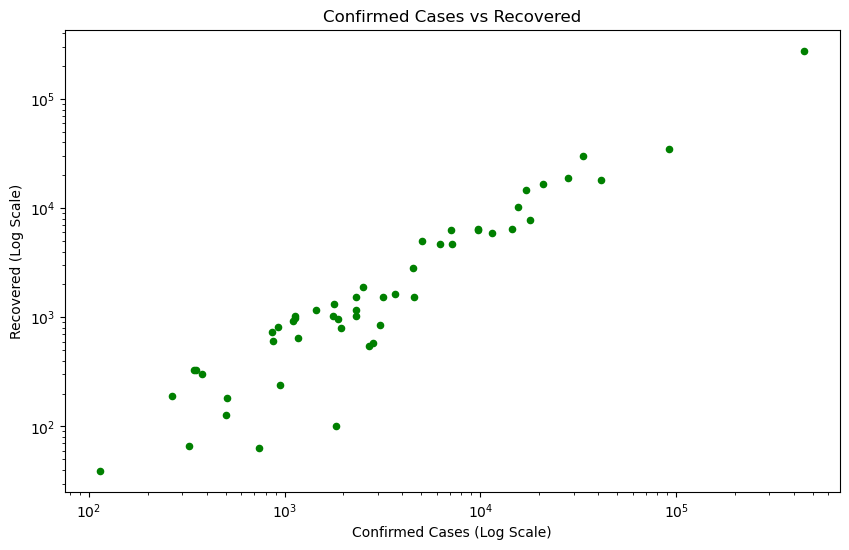

In [31]:
import matplotlib.pyplot as plt

# Scatter plot: Confirmed vs Deaths
jitter_confirmed = data['Confirmed'] + np.random.normal(0, 0.1, size=len(data))
jitter_deaths = data['Deaths'] + np.random.normal(0, 0.1, size=len(data))

plt.figure(figsize=(10,6))  # creates a new figure of size 10x6 inches 
plt.scatter(data['Confirmed'], data['Deaths'], color='blue', label='Deaths', s=20)
plt.title('Confirmed Cases vs Deaths')

plt.xscale('log')
plt.yscale('log')

plt.xlabel('Confirmed Cases (Log Scale)')
plt.ylabel('Deaths (log Scale)')
plt.show()


# Scatter plot: Confirmed vs Recovered
jitter_confirmed = data['Confirmed'] + np.random.normal(0, 0.1, size=len(data))
jitter_deaths = data['Recovered'] + np.random.normal(0, 0.1, size=len(data))

plt.figure(figsize=(10,6))
plt.scatter(data['Confirmed'], data['Recovered'], color='green', label='Recovered', s=20)
plt.title('Confirmed Cases vs Recovered')

plt.xscale('log')
plt.yscale('log')

plt.xlabel('Confirmed Cases (Log Scale)')
plt.ylabel('Recovered (Log Scale)')

plt.show()


# 🧹 Step 3: Clean and split the Data
We should remove negatives values, handle missing values and split the data.
#### Time to tidy up!

In [9]:
import pandas as pd
data = pd.read_csv('SGA_Health_DataSet.csv')


# Check for missing values
missing_values = data.isnull().sum()
print(missing_values)

# Drop rows with missing values
data_cleaned = data.dropna()


# Remove negative values in the 'Confirmed', 'Deaths', and 'Recovered' columns
data_cleaned = data[(data['Confirmed'] >= 0) & 
                    (data['Deaths'] >= 0) & 
                    (data['Recovered'] >= 0)]




# Verify that no negative values or missing data remain
no_negative_values = (data['Confirmed'] >= 0).all() and \
                     (data['Deaths'] >= 0).all() and \
                     (data['Recovered'] >= 0).all()

if no_negative_values:
    print("No negative values found in 'Confirmed', 'Deaths', and 'Recovered'.")
else:
    print("There are negative values in one of the columns.")


no_missing_values = data.isnull().sum().sum() == 0

if no_missing_values:
    print("No missing data found in the dataset.")
else:
    print("There are missing values in the dataset.")


# Check if there are any negative values left
negative_values = data[(data['Confirmed'] < 0) | 
                       (data['Deaths'] < 0) | 
                       (data['Recovered'] < 0)]

# Print rows with negative values, if any
if not negative_values.empty:
    print("Rows with negative values:\n", negative_values)
else:
    print("No negative values found in 'Confirmed', 'Deaths', or 'Recovered'.")


# Show the cleaned dataset
print("Cleaned dataset:\n", data_cleaned)



Country/Region    0
Confirmed         0
Recovered         0
Deaths            0
dtype: int64
No negative values found in 'Confirmed', 'Deaths', and 'Recovered'.
No missing data found in the dataset.
No negative values found in 'Confirmed', 'Deaths', or 'Recovered'.
Cleaned dataset:
               Country/Region  Confirmed  Recovered  Deaths
0                    Algeria      27973      18837    1163
1                     Angola        950        242      41
2                      Benin       1770       1036      35
3                   Botswana        739         63       2
4               Burkina Faso       1100        926      53
5                    Burundi        378        301       1
6                 Cabo Verde       2328       1550      22
7                   Cameroon      17110      14539     391
8   Central African Republic       4599       1546      59
9                       Chad        922        810      75
10                   Comoros        354        328       7
11      

Now that we’ve cleaned our data by removing a feature that is irrelevant feature for our prediction 😄, it's time for another super important step: **splitting the data**!

We’re going to split the dataset into two parts:
- **Training set** (80% of the data): This is the data we'll use to **train** our linear regression model.
- **Testing set** (20% of the data): This is a smaller portion of the data that we’ll set aside and not touch until the very end. We’ll use this data to **test** how well our model does on new, unseen data.

### Why do we split the data?

When we train a model, we want it to be able to **generalize** well—that means it should perform well on data it hasn’t seen before, not just the data it has been trained on.

If we train the model and then test it on the same data, it could look like it’s doing a great job, but really it’s just memorizing the answers. That’s why we set some data aside for testing. (It won't be seen during the training) 💡

Let’s go ahead and split our cleaned dataset!

In [11]:
from sklearn.model_selection import train_test_split

# Features (Confirmed cases) and Target (Deaths and Recovered)
# Independent variable (Confirmed cases)
X = data[['Confirmed']]  

# Dependent variable (Deaths)
y_deaths = data['Deaths']

# Dependent variable (Recovered)
y_recovered = data['Recovered'] 

# Split data for Deaths prediction: 80% training, 20% testing
X_train_deaths, X_test_deaths, y_train_deaths, y_test_deaths = train_test_split(
    X, y_deaths, test_size=0.2, random_state=42
)


# Split data for Recovered prediction: 80% training, 20% testing
X_train_recovered, X_test_recovered, y_train_recovered, y_test_recovered = train_test_split(
    X, y_recovered, test_size=0.2, random_state=42
)

# Check the sizes of the splits
# Check the sizes of the splits for Deaths prediction
print(f"Deaths - Training set size: {X_train_deaths.shape[0]}, Testing set size: {X_test_deaths.shape[0]}")

# Check the sizes of the splits for Recovered prediction
print(f"Recovered - Training set size: {X_train_recovered.shape[0]}, Testing set size: {X_test_recovered.shape[0]}")



Deaths - Training set size: 41, Testing set size: 11
Recovered - Training set size: 41, Testing set size: 11


### 🎯 What have we done here?
1. We used the **`train_test_split`** function from scikit-learn to randomly split our data into a training set and a testing set.
2. The training set (80% of the data) will be used to **teach our model** how to predict the strike rate based on runs scored and balls faced.
3. The testing set (20% of the data) will stay hidden until the very end. We’ll use it to **test** how well our model does with new, unseen data!
  
Now that our data is split, we can visualize our training set !

# 🧠 Step 4: Apply Linear Regression
### Part A: Predicting Deaths from Confirmed Cases
We’ll use **linear regression** to predict the number of deaths based on the number of confirmed cases.

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Apply linear regression
# Create linear regression model for Deaths prediction
lr_deaths = LinearRegression()

# Train the model using the training set for Deaths
lr_deaths.fit(X_train_deaths, y_train_deaths)


# Make predictions using the testing set
y_pred_deaths = lr_deaths.predict(X_test_deaths)


# Print the model coefficients and intercept
print("Deaths Prediction:")
print(f"Coefficient: {lr_deaths.coef_[0]}")
print(f"Intercept: {lr_deaths.intercept_}\n")



Deaths Prediction:
Coefficient: 0.01982866069739963
Intercept: 7.659419775913278



### 🎯 What Did We Learn?

- **Intercept (Deaths)**: The intercept of **7.66** suggests that even if a country had zero confirmed cases, there would still be an expected **7.66 deaths**. While this may not seem practical (since deaths usually come from confirmed cases), it could represent initial deaths before the virus spread was fully tracked or some baseline level of error in the model.
  
- **Coefficient (Deaths)**: The coefficient of **0.0198** means that for every **additional confirmed case**, we expect an increase of approximately **0.0198 deaths**. In other words, for every 100 confirmed cases, we predict about **2 additional deaths**.




### Part B: Predicting Recoveries from Confirmed Cases
Next, let’s predict the number of recoveries using confirmed cases.

In [17]:
# Apply linear regression
# Create linear regression model for Recovered prediction
lr_recovered = LinearRegression()

# Train the model using the training set for Recovered
lr_recovered.fit(X_train_recovered, y_train_recovered)


# Make predictions using the testing set
y_pred_recovered = lr_recovered.predict(X_test_recovered)


# Print the model coefficients and intercept
print("Recovered Prediction:")
print(f"Coefficient: {lr_recovered.coef_[0]}")
print(f"Intercept: {lr_recovered.intercept_}")




Recovered Prediction:
Coefficient: 0.6355993396768055
Intercept: -117.22129907275394


### 🎯 What Did We Learn?

- **Intercept (Recovered)**: The intercept of **-117.22** is more interesting. It suggests that without any confirmed cases, the model predicts negative recoveries (which isn’t possible in reality). This could indicate that the relationship between confirmed cases and recoveries starts to make sense only after a certain threshold of cases is reached.

- **Coefficient (Recovered)**: The coefficient of **0.636** means that for every **additional confirmed case**, we expect an increase of approximately **0.636 recoveries**. This suggests a strong positive relationship between confirmed cases and recoveries, which is logical because as more people contract COVID-19, more people will recover over time.

### **What Does This Mean?**

You've successfully built and trained a **linear regression model** to predict **deaths** and **recoveries** from COVID-19 based on confirmed cases. By interpreting the intercept and coefficients, you can now understand how confirmed cases influence both **deaths** and **recoveries** on average.

- For **deaths**, the number increases slightly with each additional confirmed case.
- For **recoveries**, there’s a much stronger relationship between the number of confirmed cases and the number of recoveries, which makes sense given the nature of the disease.

And guess what? You’ve just trained a machine learning model to make important health-related predictions! 🎉 How amazing is that? 😊

# 🎨 Step 5: Visualize the Regression Models in 2D
Finally, let’s create a 2D visualization to really see how our model fits the data. This will help us understand how the predictions line up with the actual data.

To visualize the **fitted linear regression models** for both predictions (Deaths and Recoveries) based on Confirmed cases, we will:
1. **Plot the actual data points** (scatter plot).
2. **Plot the fitted regression line** based on the model’s predictions.

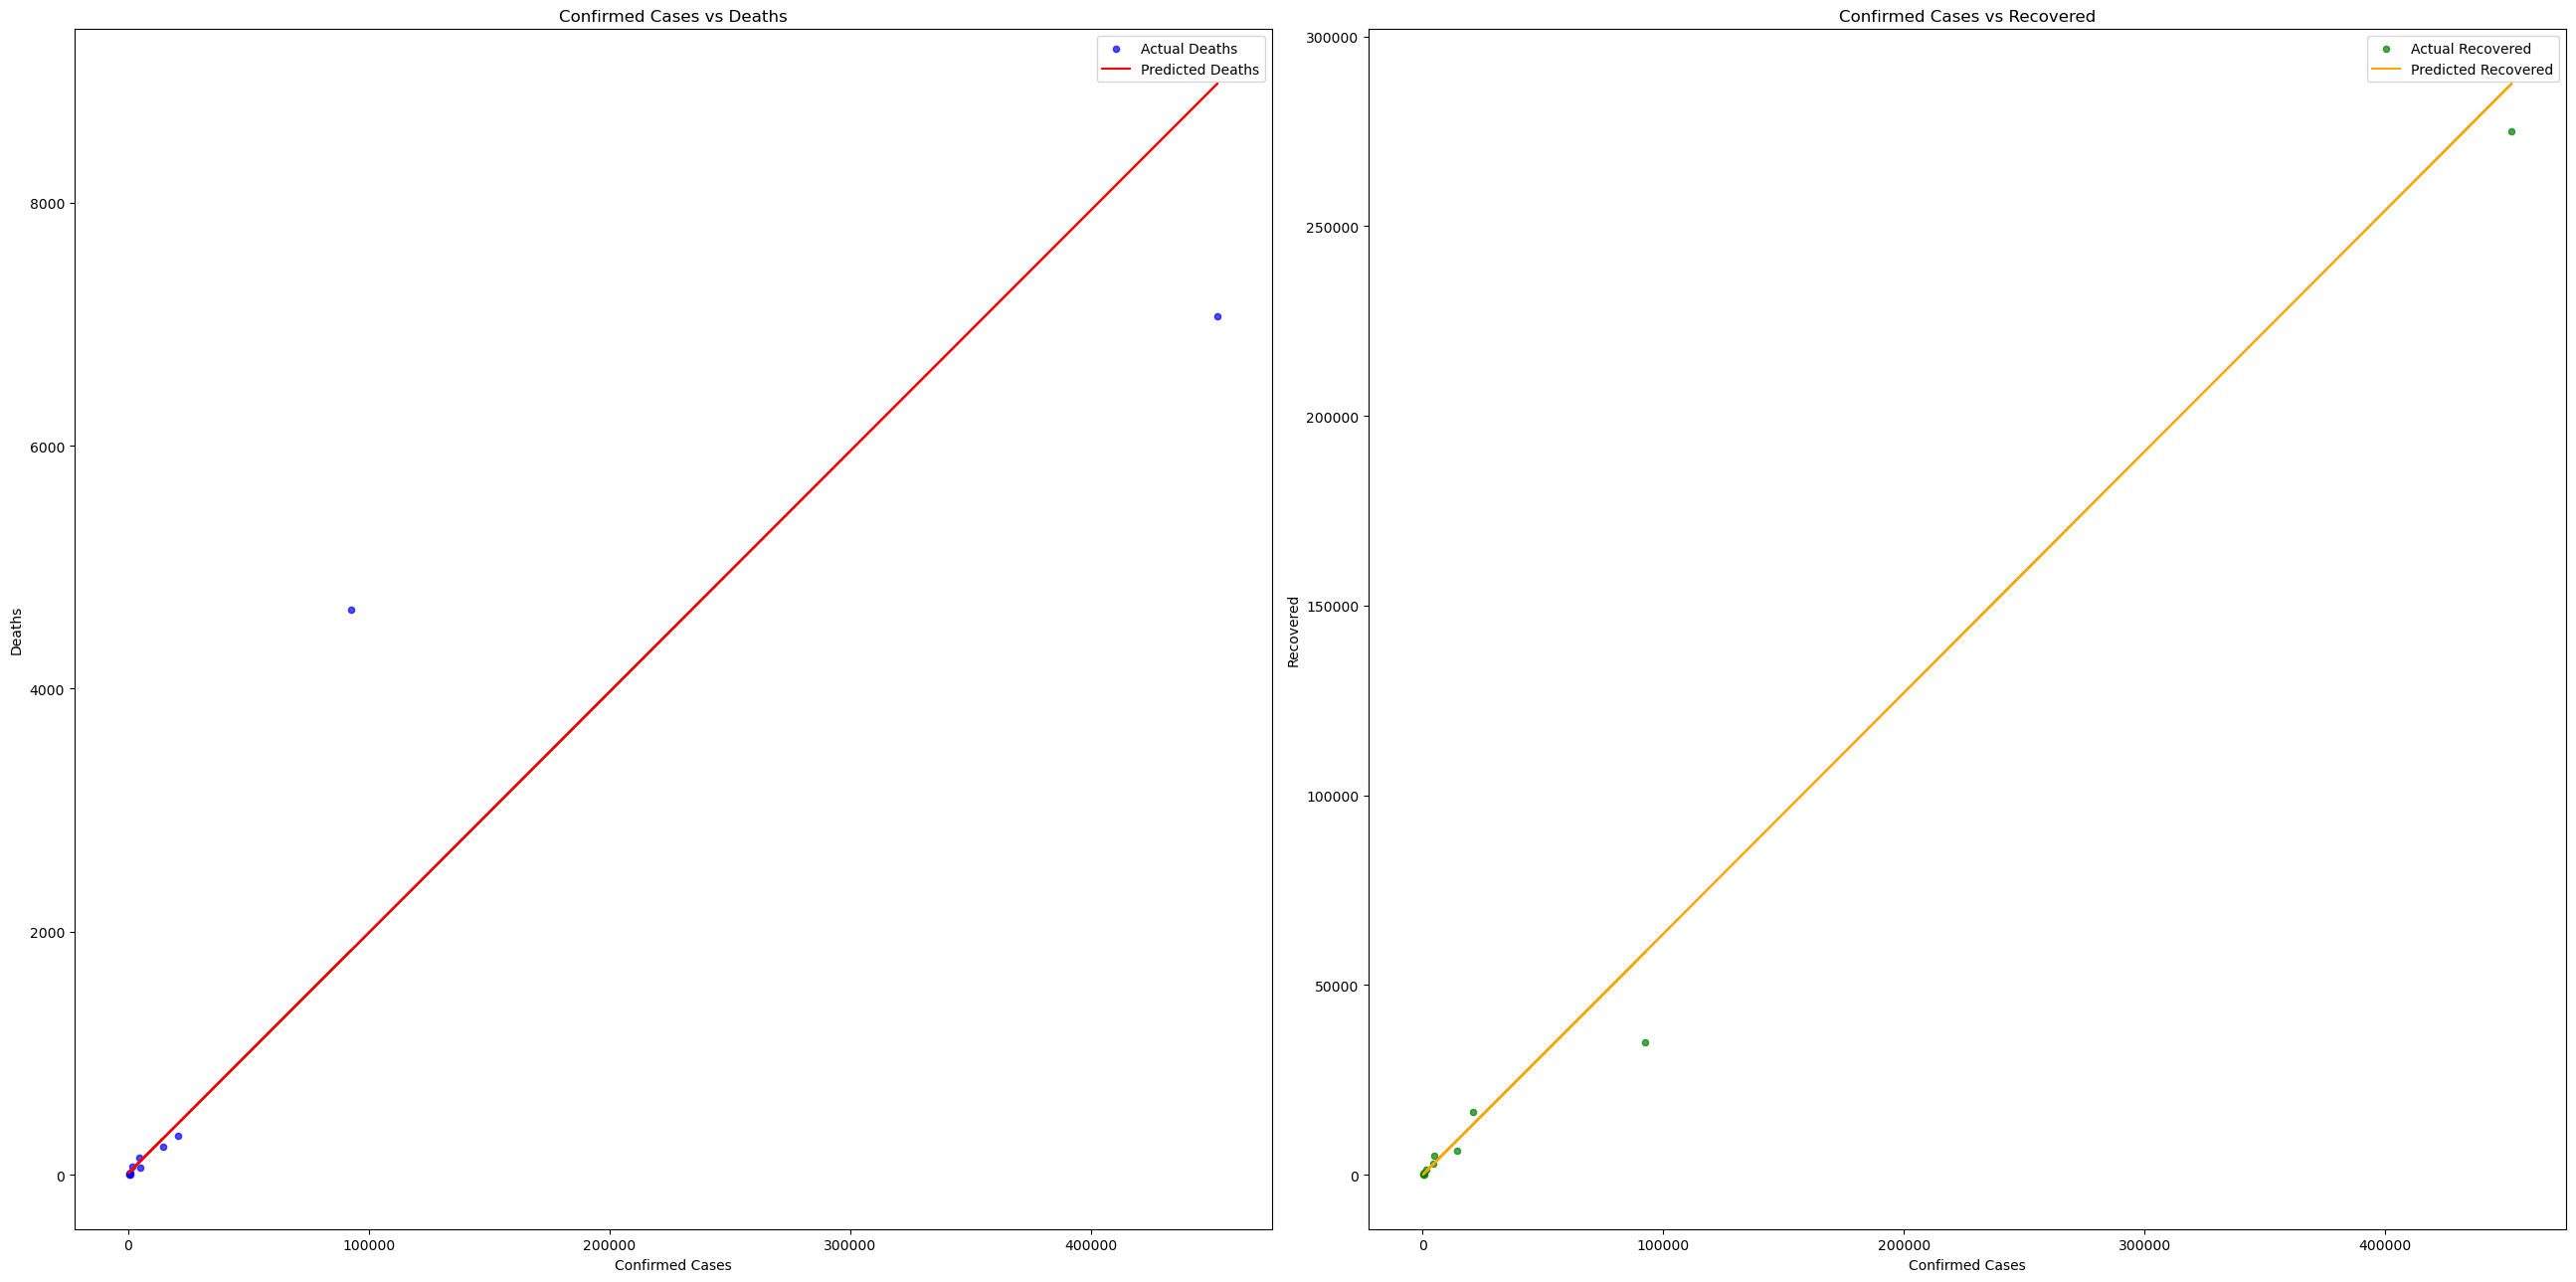

In [63]:
import matplotlib.pyplot as plt
import numpy as np

# Visualize the model for predicting Deaths
plt.figure(figsize=(26, 13))


# Subplot 1: Confirmed Cases vs Deaths
plt.subplot(1, 2, 1)
plt.scatter(X_test_deaths_jitter, y_test_deaths, color='blue', label='Actual Deaths', s=20, alpha=0.7)
plt.plot(X_test_deaths, y_pred_deaths, color='red', label='Predicted Deaths')  # Regression line
plt.title('Confirmed Cases vs Deaths')


           
plt.xlabel('Confirmed Cases')
plt.ylabel('Deaths')
plt.legend(loc='best')

# Subplot 2: Confirmed Cases vs Recovered
plt.subplot(1, 2, 2)
plt.scatter(X_test_recovered_jitter, y_test_recovered, color='green', label='Actual Recovered', s=20, alpha=0.7)
plt.plot(X_test_recovered, y_pred_recovered, color='orange', label='Predicted Recovered')  # Regression line
plt.title('Confirmed Cases vs Recovered')

plt.xlabel('Confirmed Cases')
plt.ylabel('Recovered')
plt.legend(loc='best')


# Display the plots
plt.tight_layout()
plt.show()

# 📊 Step 6: Test the Model on the Testing Set

Now that we’ve trained our linear regression model, it’s time to test it on the **testing set** we set aside earlier. Remember, this part of the data wasn’t used for training, so it will give us a good idea of how well the model generalizes to new, unseen data.



For this, we use two important metrics: **Mean Squared Error (MSE)** and **Mean Absolute Error (MAE)**.

### 🔍 What are MSE and MAE?

- **Mean Squared Error (MSE)**:
  - This measures how far the predicted values are from the actual values. It calculates the **square of the difference** between predicted and actual values for each data point, then averages them.
  - **Why squaring?** Squaring the errors gives more weight to large errors, so bigger mistakes have a larger impact on the final score.
  - **Lower MSE** means better model performance!

- **Mean Absolute Error (MAE)**:
  - This also measures how far the predicted values are from the actual values, but instead of squaring the differences, it just takes the **absolute difference** (ignoring the sign, so no negatives) and averages them.
  - **Why absolute values?** It treats all errors equally, meaning it’s easier to interpret as the "average size" of the errors.
  - **Lower MAE** means better accuracy!

### 📌 Why Do We Use Both?

- **MSE** is useful when we want to penalize large errors more heavily (because of the squaring).
- **MAE** is better for getting a more balanced, average sense of how far off the predictions are.

Both are common ways to measure the performance of models in data science, and using both can give us a more complete understanding of how well our model is predicting the **female out-of-school rates**.

### Code to Test the Model:

In [65]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Evaluate model for Deaths
mse_deaths = mean_squared_error(y_test_deaths, y_pred_deaths)
mae_deaths = mean_absolute_error(y_test_deaths, y_pred_deaths)

print("Evaluation for Deaths Prediction:")
print(f"Mean Squared Error (MSE): {mse_deaths}")
print(f"Mean Absolute Error (MAE): {mae_deaths}\n")


# Evaluate model for Recovered
mse_recovered = mean_squared_error(y_test_recovered, y_pred_recovered)
mae_recovered = mean_absolute_error(y_test_recovered, y_pred_recovered)

print("Evaluation for Recovered Prediction:")
print(f"Mean Squared Error (MSE): {mse_recovered}")
print(f"Mean Absolute Error (MAE): {mae_recovered}")

Evaluation for Deaths Prediction:
Mean Squared Error (MSE): 1052978.5460317768
Mean Absolute Error (MAE): 460.0724814485329

Evaluation for Recovered Prediction:
Mean Squared Error (MSE): 68080292.52367178
Mean Absolute Error (MAE): 4129.752477210926


### Why Are the Errors Considered Good Despite Being Large?
Looking at the Mean Squared Error (MSE) and Mean Absolute Error (MAE), the values seem quite large at first glance, especially the MSE. However, given the context of the data and the nature of the numbers involved, these errors are reasonable for a few reasons:

1. **Scale of the Data:**
* The number of confirmed cases in some countries, like Egypt and South Africa, reaches hundreds of thousands. When you are working with such large numbers, it’s natural for error metrics like MSE and MAE to also reflect higher values.
* The deaths and recoveries can range from a few dozen to tens of thousands, which makes absolute errors (like 460 for deaths or 4129 for recoveries) relatively small compared to the overall numbers.

2. **MSE Punishes Large Errors More:**

* Mean Squared Error (MSE) squares the difference between predicted and actual values, which means larger errors are punished more heavily. Given that some countries have very high death or recovery numbers, it’s expected that MSE will be larger when there are a few points far from the prediction.
* Mean Absolute Error (MAE), on the other hand, gives a better sense of the typical error. An MAE of 460 deaths or 4129 recoveries may seem large, but it's quite reasonable when considering that deaths can be in the thousands, and recoveries in the hundreds of thousands.

![image.png](attachment:f5a3e9d7-20a0-445c-90a9-88457a2fbdff.png)

# 🔍Visualize Predicted vs Actual Data:

To visualize the **predicted vs actual data** for both **Deaths** and **Recoveries**, we can plot both the **actual** values and the **predicted** values on the same plot. This helps in visually comparing how close the predictions are to the actual data.

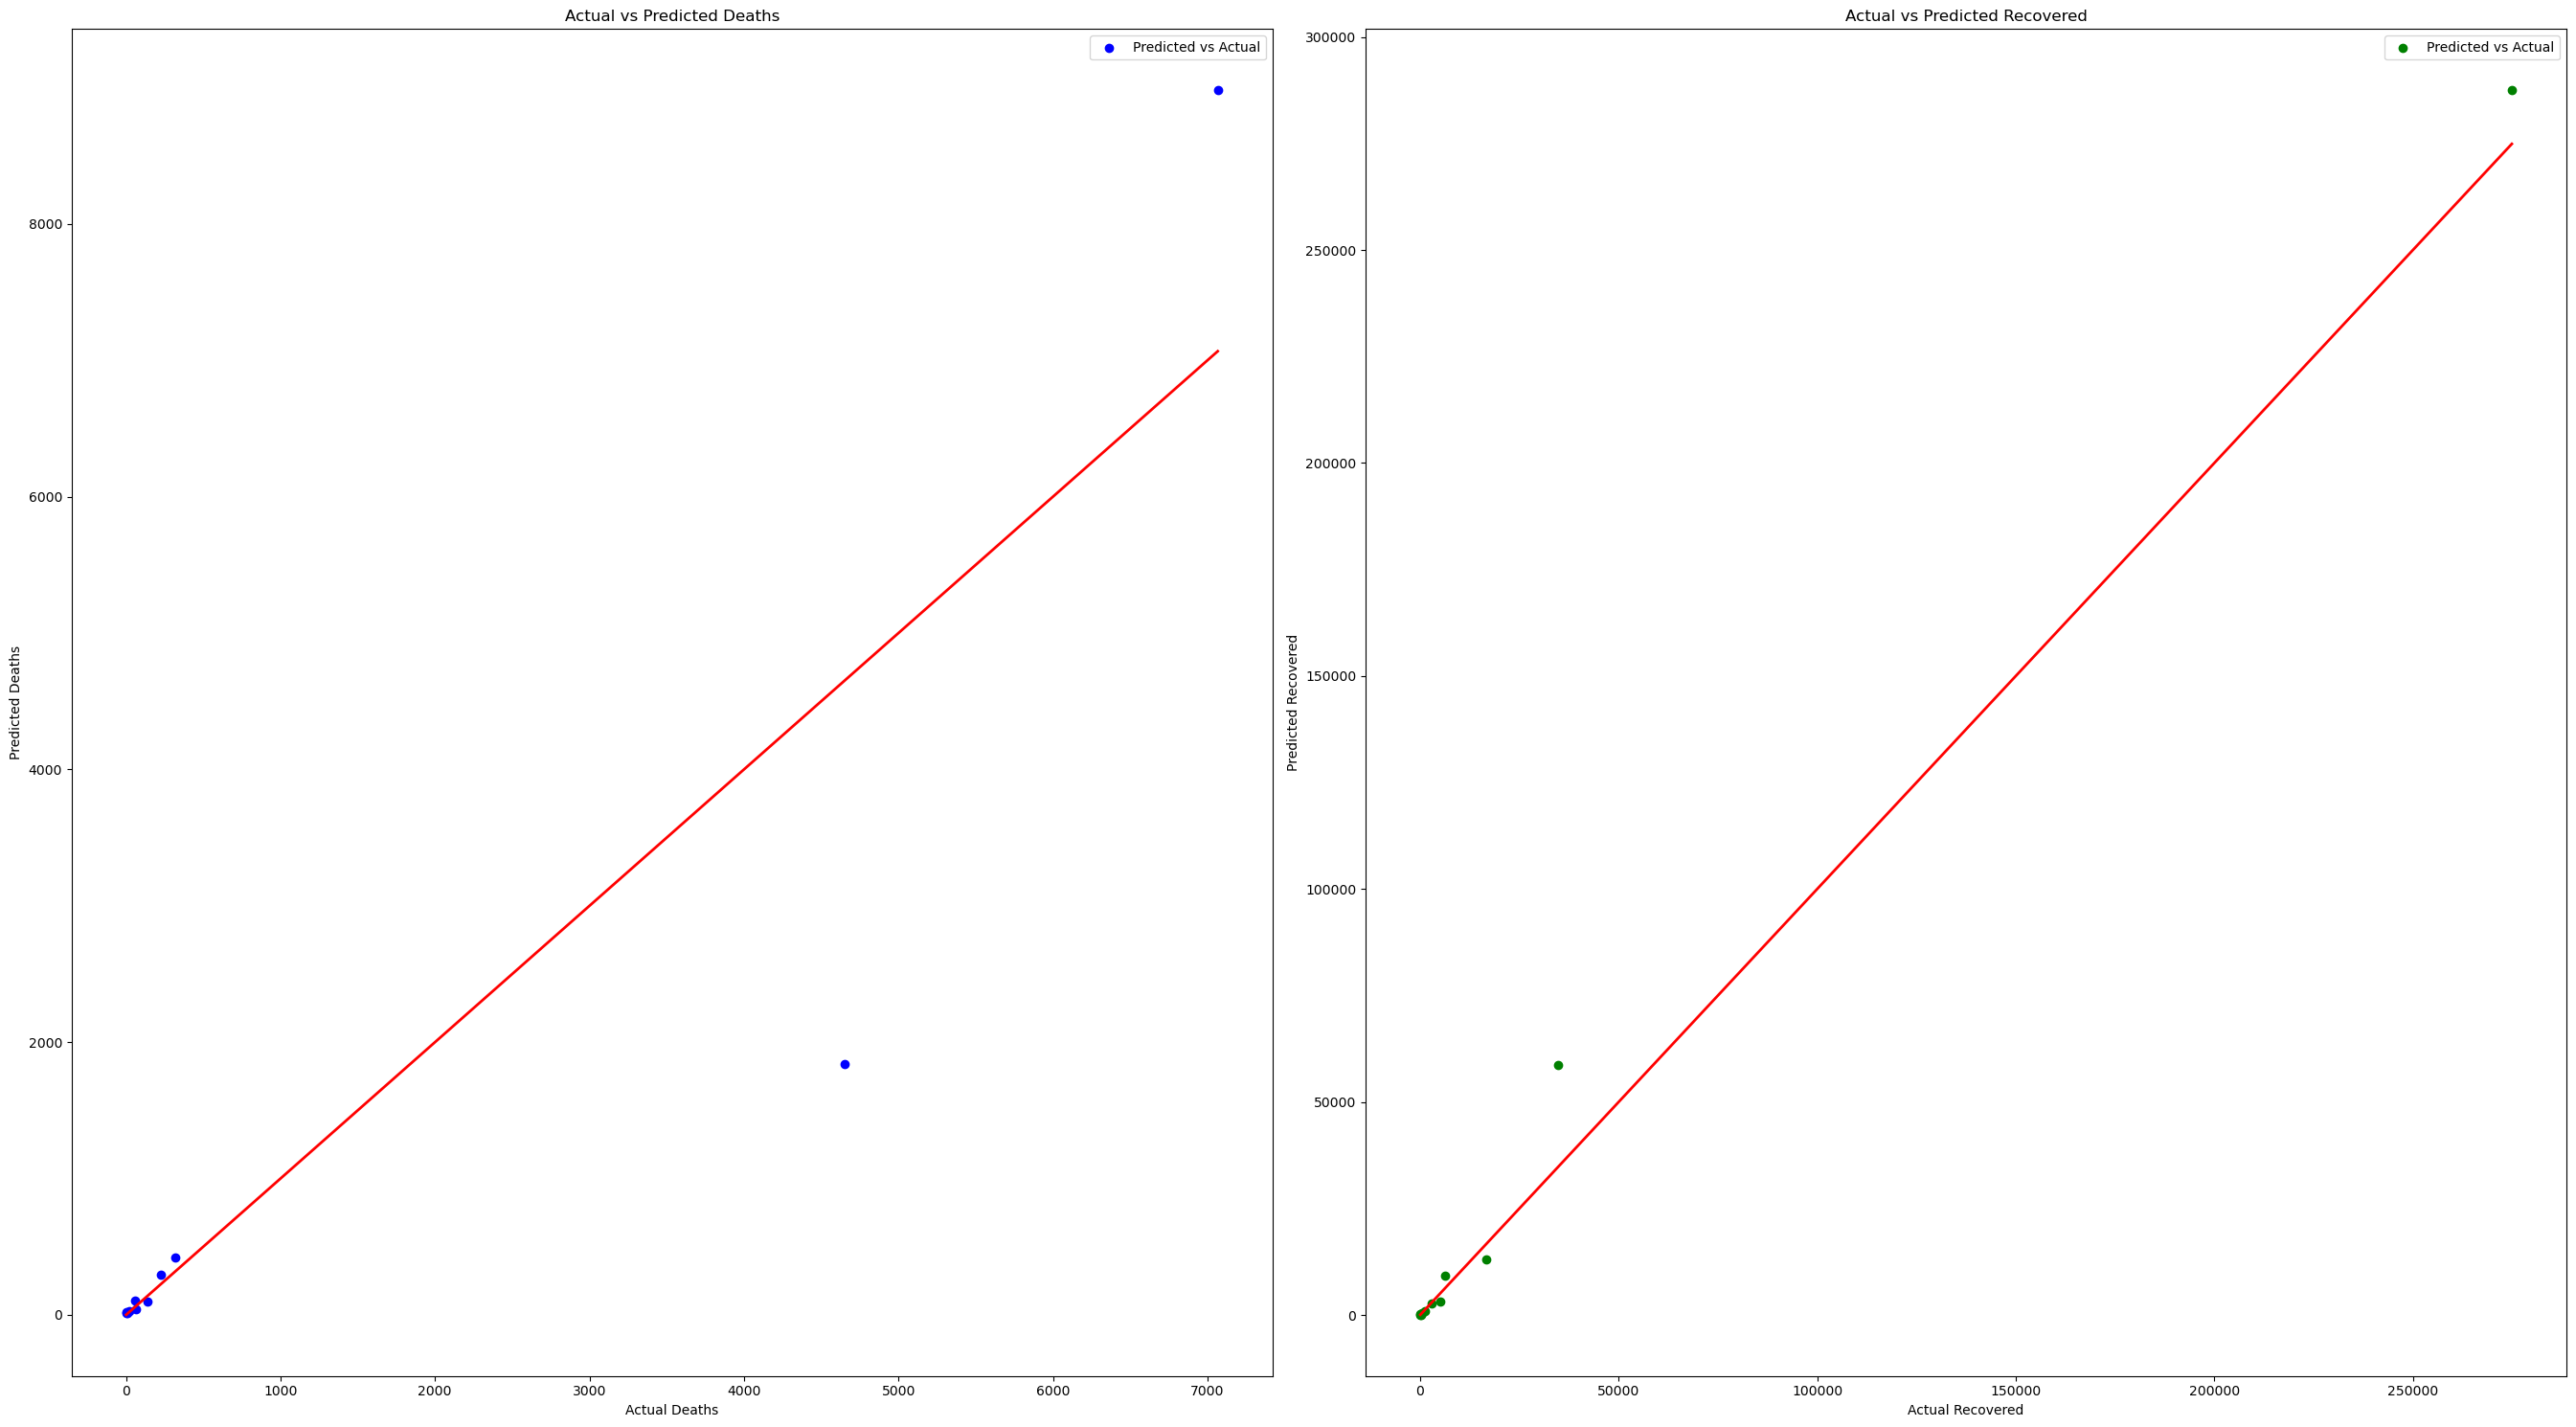

In [81]:
import matplotlib.pyplot as plt

# Create a figure for the subplots
plt.figure(figsize=(27, 15))


# Subplot 1: Actual vs Predicted Deaths
plt.subplot(1, 2, 1)
plt.scatter(y_test_deaths, y_pred_deaths, color='blue', label='Predicted vs Actual')
plt.plot([y_test_deaths.min(), y_test_deaths.max()], [y_test_deaths.min(), y_test_deaths.max()], color='red', lw=2)  # Diagonal line
plt.title('Actual vs Predicted Deaths')
plt.xlabel('Actual Deaths')
plt.ylabel('Predicted Deaths')
plt.legend()

# Subplot 2: Actual vs Predicted Recoveries
plt.subplot(1, 2, 2)
plt.scatter(y_test_recovered, y_pred_recovered, color='green', label='Predicted vs Actual')
plt.plot([y_test_recovered.min(), y_test_recovered.max()], [y_test_recovered.min(), y_test_recovered.max()], color='red', lw=2)  # Diagonal line
plt.title('Actual vs Predicted Recovered')
plt.xlabel('Actual Recovered')
plt.ylabel('Predicted Recovered')
plt.legend()

# Display the plots
plt.tight_layout()
plt.show()


This visualization provides a direct comparison of the **actual vs predicted** data, allowing you to see how well your model has performed across different countries! 😊

# 🚀 **Conclusion: Keep Going! Your Journey in Data Science Has Just Begun**

* We successfully used **linear regression** to model and predict the number of **deaths** and **recoveries** based on the number of confirmed cases. * By visualizing and evaluating the results, we can see how well the model fits the actual data. In future projects, you can extend this by adding more features (e.g., country, population density) or exploring more advanced models like polynomial regression or decision trees to improve prediction accuracy.

### ✨ **What’s Next?**
Now that you’ve mastered the basics of linear regression, you can start exploring more advanced models and techniques, such as:
- **Polynomial Regression**: If the relationship between variables isn’t purely linear, polynomial regression can help capture more complex patterns.
- **Decision Trees and Random Forests**: These models are great for handling more complex datasets, and they can often improve prediction accuracy.
- **Feature Engineering**: You can experiment with adding more features.

### 📚 **Join More Workshops and Keep Learning!**
This workshop is just one step in your data science journey. There are so many other models, tools, and techniques waiting for you to explore. Whether it’s **deep learning**, **clustering**, or even **natural language processing**, there’s always something new to learn and discover.

### 🎯 **You’ve Got This!**
Remember, every great data scientist started just like you—building their first models, learning from their results, and experimenting with new techniques. With each new workshop and project, you’ll get better and better at unlocking insights from data. So don’t stop here—keep going, keep experimenting, and keep learning.

We’re excited to see what you’ll achieve next! Join us in future workshops to dive even deeper into the world of data science and machine learning. The possibilities are endless, and you’re already on the path to greatness! 🚀

Stay curious, keep coding, and never stop learning! 💻✨


- This is a fun and engaging notebook documentation that explains everything in a way that is accessible and encouraging for the students.
- The content has been formatted for direct use in a Jupyter Notebook.